# PCA 
***머신러닝은 개념을 배운뒤에 그것을 쓴 결과가 어떻게 되는지 보는게 더 중요***
- 차원축소, 변수추출 기법으로 널리 쓰이고 있는 주성분 분석
- 변수 추출은 변수 선택과 엄연히 구분되는 개념이다
- 벡터를 이용해서, 어떤 벡터를 선정하면 본래 데이터 구조를 가장 잘 유지할 수 있을까 고민
- 데이터를 새로운 축으로 표현하는 것 

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

rng = np.random.RandomState(13)
X = np.dot(rng.rand(2,2),rng.randn(2,200)).T
X.shape

(200, 2)

In [3]:
#표준정규분포를 따르는 숫자를 200개 나열
rng.randn(2,200)

array([[ 1.27512584e+00,  4.60994651e-01, -5.95685605e-01,
         7.95876991e-01, -2.23305285e+00,  1.42026788e-01,
         7.42047827e-01,  1.11144113e+00,  4.49767208e-01,
        -1.43039670e+00,  9.42539772e-01, -5.35146593e-01,
        -4.58967168e-01,  1.15152877e+00, -1.97741771e+00,
         2.23864876e+00,  9.00084997e-01,  8.89032373e-01,
        -1.52296574e-01,  7.04626895e-01,  6.12955068e-01,
         2.39663182e-01, -1.51202147e+00,  4.44697716e-01,
         2.53220525e-01,  9.40787068e-01,  4.17302320e-01,
         2.69558553e-01,  1.68721062e-01, -1.48895017e+00,
        -1.85526666e+00, -1.10321722e-01, -7.04604762e-01,
         4.55318527e-01, -1.22067190e+00, -5.65046518e-01,
         7.06188812e-01,  5.04389807e-03, -8.73259179e-01,
         5.56018081e-01,  2.67381976e-01, -1.03193483e+00,
        -6.35903189e-01,  1.99779097e-01, -1.96516643e-01,
        -2.64890894e-01, -5.36168707e-01, -2.69395632e+00,
         4.81339952e-01,  3.08090862e-01, -1.37528268e-0

In [6]:
np.dot(rng.rand(2,2),rng.randn(2,200)).T

array([[-1.11650272e+00, -1.73470818e+00],
       [ 2.43624030e-01,  1.67939807e-01],
       [ 1.27860518e+00,  8.79352005e-01],
       [ 2.33297506e-02,  6.85723809e-01],
       [ 1.41812124e-01,  3.21670558e-01],
       [-1.10609928e+00, -1.24164580e+00],
       [ 9.76000434e-01,  9.00651201e-01],
       [-3.11905174e-01, -4.30516827e-01],
       [-3.52027003e-02, -2.91701623e-01],
       [ 1.01648725e+00,  1.04163904e+00],
       [-2.51570658e+00, -2.04576028e+00],
       [ 1.20061874e+00,  1.76619494e+00],
       [ 6.55016000e-01,  7.67627806e-01],
       [ 7.37333904e-01,  7.88359465e-01],
       [ 1.90255634e+00,  5.42077107e-01],
       [ 1.09586461e+00,  7.95537531e-01],
       [ 1.43726910e+00,  8.53563838e-01],
       [-1.68785813e-01,  8.98538434e-02],
       [-2.31584900e-01, -9.99567374e-01],
       [ 1.74427449e+00,  8.53395246e-01],
       [-1.59436087e-01,  1.01243759e-01],
       [ 1.16440137e-01,  6.12706511e-01],
       [-9.04733229e-01, -4.74131038e-02],
       [-8.

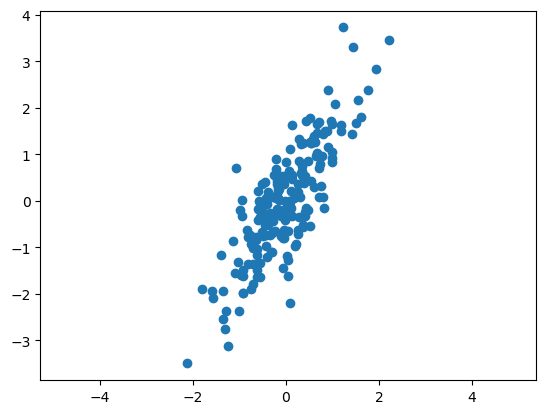

In [9]:
plt.scatter(X[:,0],X[:,1])
plt.axis('equal') #x,y축 같은 간격으로 표현
plt.show()

In [10]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2,random_state=13)
pca.fit(X)

PCA(n_components=2, random_state=13)

In [11]:
pca.components_
#2개의 벡터가 나왔음

array([[ 0.47802511,  0.87834617],
       [-0.87834617,  0.47802511]])

In [12]:
pca.explained_variance_
#벡터의 설명력

array([1.82531406, 0.13209947])

In [13]:
pca.explained_variance_ratio_

array([0.93251326, 0.06748674])

In [14]:
#주성분 벡터 그리는 함수
def draw_vector(v0,v1,ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(
        arrowstyle='->',
        linewidth = 2,
        color='black',
        shrinkA=0,
        shrinkB=0
    )
    ax.annotate('',v1,v0,arrowprops=arrowprops)

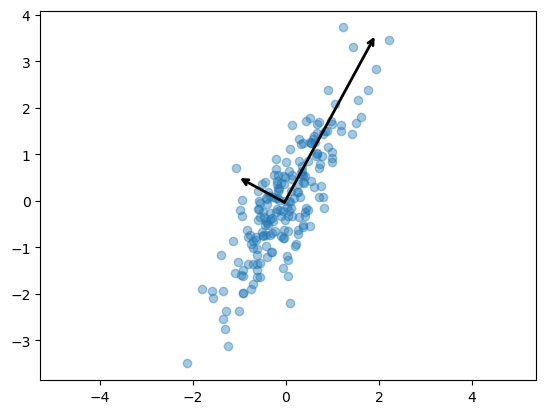

In [17]:
plt.scatter(X[:,0],X[:,1], alpha=0.4)

for length, vector in zip(pca.explained_variance_,pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')
plt.show()


In [16]:
#벡터의 출발지점
pca.mean_

array([-0.03360413, -0.03527382])

주성분을 찾으면 데이터의 주축을 변경하는 것도 가능하다.
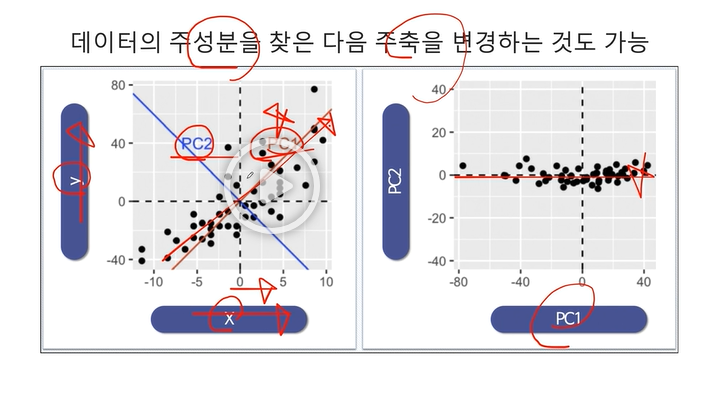

In [18]:
#n_components를 1로 해보자

pca = PCA(n_components=1,random_state=13)
pca.fit(X)

PCA(n_components=1, random_state=13)

In [19]:
pca.components_

array([[0.47802511, 0.87834617]])

In [20]:
pca.mean_

array([-0.03360413, -0.03527382])

In [21]:
pca.explained_variance_

array([1.82531406])

이제 PCA가 적용된 데이터를 만들자

In [22]:
X_pca = pca.transform(X)
X_pca

array([[-2.95245605e-01],
       [ 5.81990204e-01],
       [ 4.94740664e-01],
       [ 3.90158943e+00],
       [ 2.03180114e+00],
       [-2.37387479e-01],
       [ 3.07183781e-01],
       [-9.76548958e-01],
       [-1.18765161e+00],
       [-2.82710528e+00],
       [-9.91290035e-01],
       [-2.02286254e-01],
       [ 6.00622089e-01],
       [ 7.79971960e-01],
       [ 7.37780392e-02],
       [ 3.46215509e+00],
       [-1.04906286e+00],
       [ 5.96660174e-01],
       [-1.81382807e+00],
       [ 4.51563537e-01],
       [ 2.01737882e+00],
       [-2.99850475e+00],
       [-1.96803107e-01],
       [-4.03478939e-02],
       [-5.99621281e-01],
       [-1.66341828e+00],
       [ 1.91711964e+00],
       [-1.26733467e+00],
       [ 5.67207186e-01],
       [ 2.22460631e+00],
       [-7.83250597e-01],
       [-1.85775051e+00],
       [-2.27800068e-01],
       [-1.24793583e+00],
       [ 1.38641268e+00],
       [-6.96367767e-01],
       [-2.14750524e+00],
       [ 1.31675186e+00],
       [-4.7

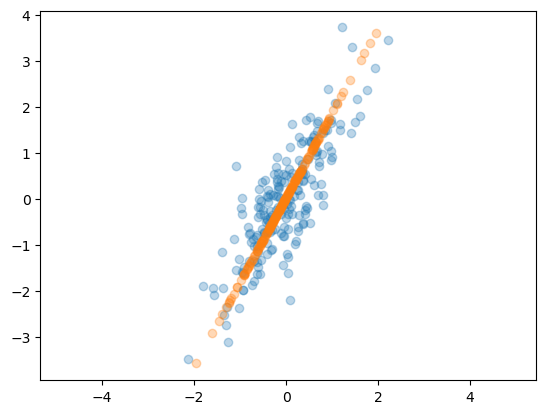

In [24]:
#주성분으로 변환된 데이터를 그래프를 위해 2차원으로 바꾸기
X_new = pca.inverse_transform(X_pca)

plt.scatter(X[:,0],X[:,1], alpha=0.3)
plt.scatter(X_new[:,0],X_new[:,1] , alpha=0.3)
plt.axis('equal')
plt.show()

결국 PCA를 통해 2차원 데이터를 1차원으로 바꿨더니 위 그래프와
같은 결과를 보였다.

---

Iris 실습

PCA에서는 scaler적용이 꽤 중요하기 때문에 Scaler적용

In [25]:
import pandas as pd
from sklearn.datasets import load_iris

In [26]:
iris = load_iris()

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['species'] = iris.target

iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [31]:
from sklearn.decomposition import PCA

def get_pca(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [32]:
iris_pca, pca = get_pca(iris_ss, 2)
iris_pca.shape

(150, 2)

In [33]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [34]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [35]:
def get_pd_from_pca(pca_data,cols=["PC1","PC2"]):
    return pd.DataFrame(pca_data, columns=cols)

In [36]:
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head()

,PC1,PC2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


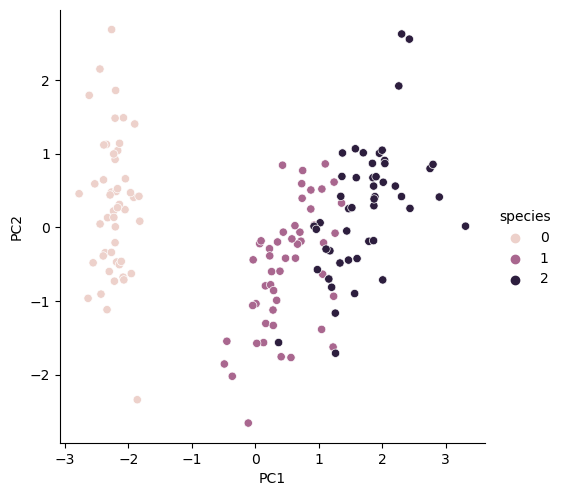

In [37]:
sns.pairplot(iris_pd_pca, hue='species', height=5, x_vars=['PC1'], y_vars=["PC2"])

### 주성분 분석의 위력

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [39]:
def rf_score(X,y,cv=5):
    rf = RandomForestClassifier(random_state=13,n_estimators=100)
    score_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv)

    print('Score:', np.mean(score_rf))

In [40]:
#우선 성분4개를 활용한 머신러닝 스코어
rf_score(iris_ss,iris.target)

Score: 0.96


In [41]:
#이번엔 PCA성분으로 

pca_x = iris_pd_pca[['PC1','PC2']]
rf_score(pca_x,iris.target)

Score: 0.9066666666666666


---

Wine 실습

In [42]:
import pandas as pd 
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url,sep=',',index_col=0)

wine_x = wine.drop(['color'],axis=1)
wine_y = wine.color

wine_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
wine_ss = StandardScaler().fit_transform(wine_x)
wine_ss[:3]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813, -0.93722961]])

In [50]:
def print_variance_ratio(pca):
    print('variance_ration:', pca.explained_variance_ratio_)
    print('sum of variance_ration:',np.sum(pca.explained_variance_ratio_))

In [51]:
pca_wine, pca = get_pca(wine_ss,2)
print_variance_ratio(pca)

variance_ration: [0.25346226 0.22082117]
sum of variance_ration: 0.4742834274323613


In [52]:
pca_wine_pd = get_pd_from_pca(pca_wine)
pca_wine_pd['color'] = wine_y.values
pca_wine_pd.head()

,PC1,PC2,color
0,-3.348438,0.568926,1
1,-3.228595,1.197335,1
2,-3.237468,0.952580,1
3,-1.672561,1.600583,1
4,-3.348438,0.568926,1


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


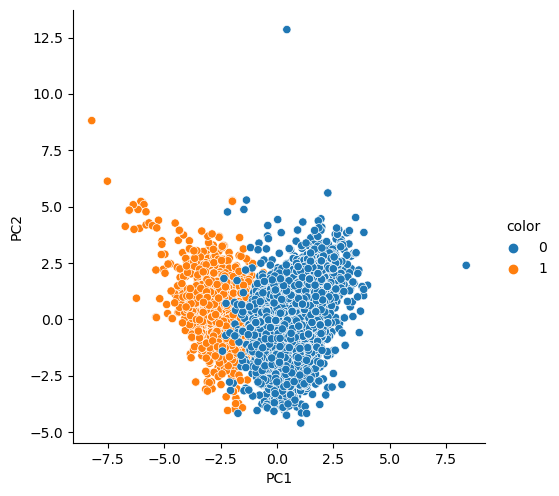

In [53]:
sns.pairplot(pca_wine_pd, hue='color', height=5, x_vars='PC1', y_vars='PC2')

In [62]:
%%time
rf_score(wine_ss,wine_y)

Score: 0.9935352638124
CPU times: total: 484 ms
Wall time: 4.12 s


In [63]:
%%time

pca_x = pca_wine_pd[['PC1','PC2']]
rf_score(pca_x,wine_y)

Score: 0.981067803635933
CPU times: total: 1.16 s
Wall time: 3.57 s


In [64]:
#주성분 3개
pca_wine, pca = get_pca(wine_ss,3)
print_variance_ratio(pca)

variance_ration: [0.25346226 0.22082117 0.13679223]
sum of variance_ration: 0.6110756621838707


In [65]:
pca_col = ['PC1','PC2','PC3']
pca_wine_pd = get_pd_from_pca(pca_wine,cols=pca_col)
pca_wine_pd['color'] = wine_y.values
pca_wine_pd.head()

,PC1,PC2,PC3,color
0,-3.348438,0.568926,-2.727386,1
1,-3.228595,1.197335,-1.998904,1
2,-3.237468,0.952580,-1.746578,1
3,-1.672561,1.600583,2.856552,1
4,-3.348438,0.568926,-2.727386,1


In [66]:
%%time

pca_x = pca_wine_pd[['PC1','PC2','PC3']]
rf_score(pca_x,wine_y)

Score: 0.9832236631728548
CPU times: total: 531 ms
Wall time: 3.86 s


In [67]:
pca_wine_plot = pca_x
pca_wine_plot['color'] = wine_y.values

In [68]:
import plotly_express as px

fig = px.scatter_3d(pca_wine_plot, x='PC1', y='PC2', z='PC3', color='color', symbol='color', opacity=0.4)
fig.update_layout(margin=dict(l=0,r=0,b=0,t=0))
fig.show()
